**CUSTOMER CHURN PREDICTION**

In [1]:
import pandas as pd

# Load the data
data = pd.read_csv('/content/Churn_Modelling.csv')

# Display the first few rows of the dataset
print(data.head())

# Drop columns that are not needed
data.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

Summary statistics

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


print(data.describe())

        CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        0.499797     57510.492818      0.402769 

Exploratory Data Analysis

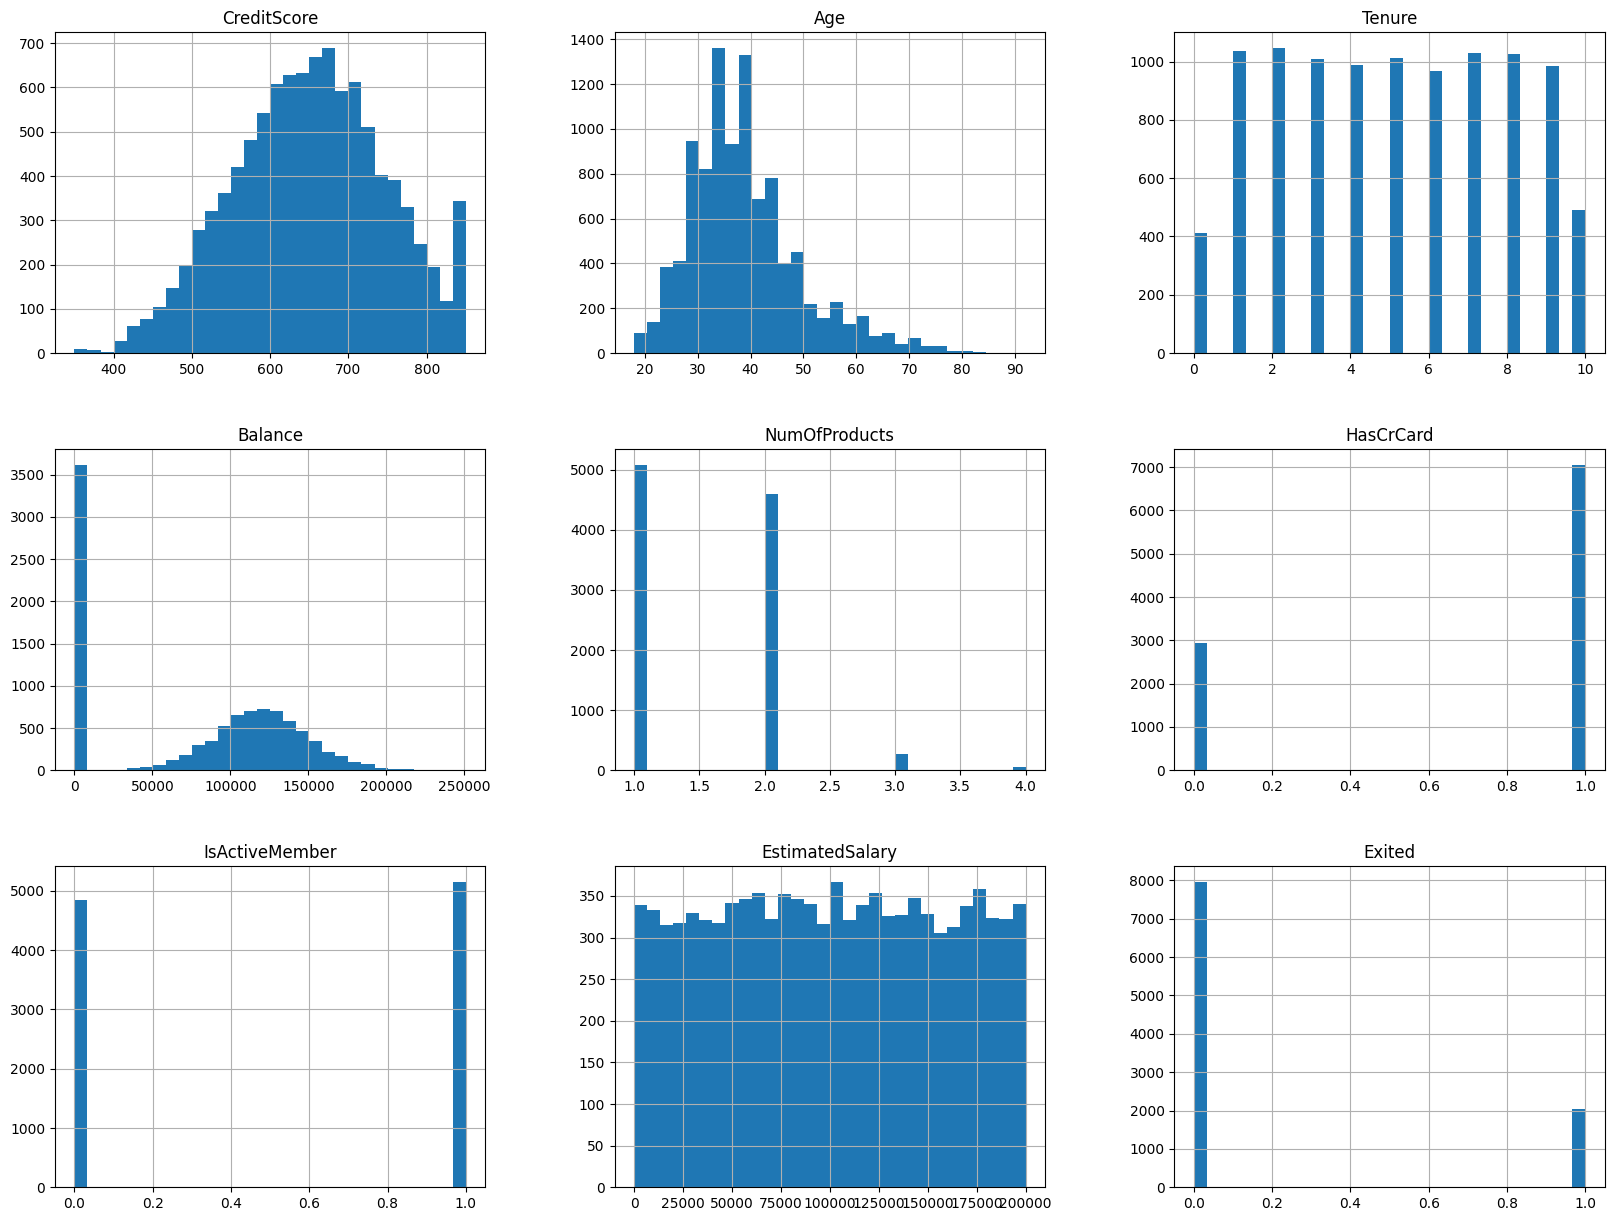

In [3]:
# Distribution of numerical features
data.hist(bins=30, figsize=(20, 15))
plt.show()

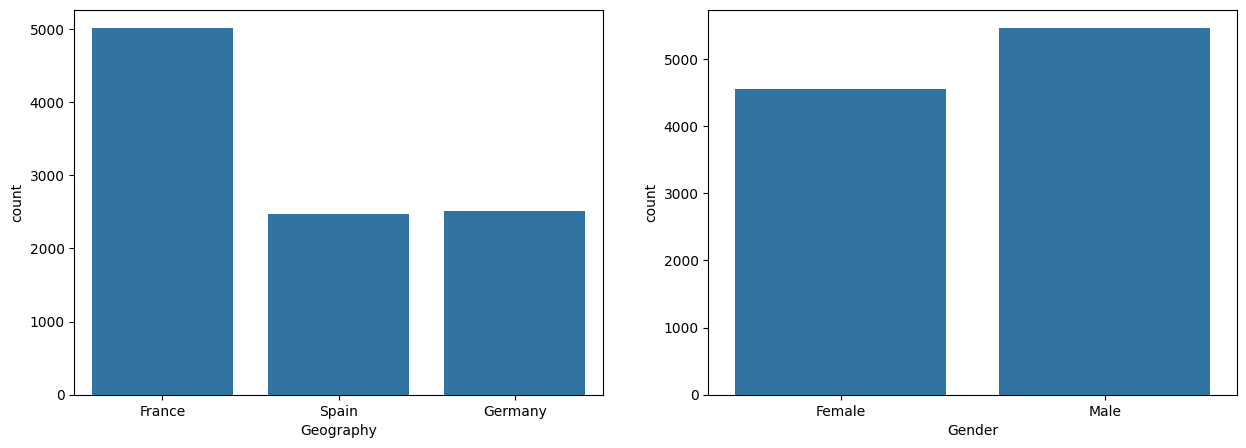

In [4]:
# Distribution of categorical features
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(ax=axes[0], x='Geography', data=data)
sns.countplot(ax=axes[1], x='Gender', data=data)
plt.show()

In [6]:
# Encode categorical variables for correlation matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

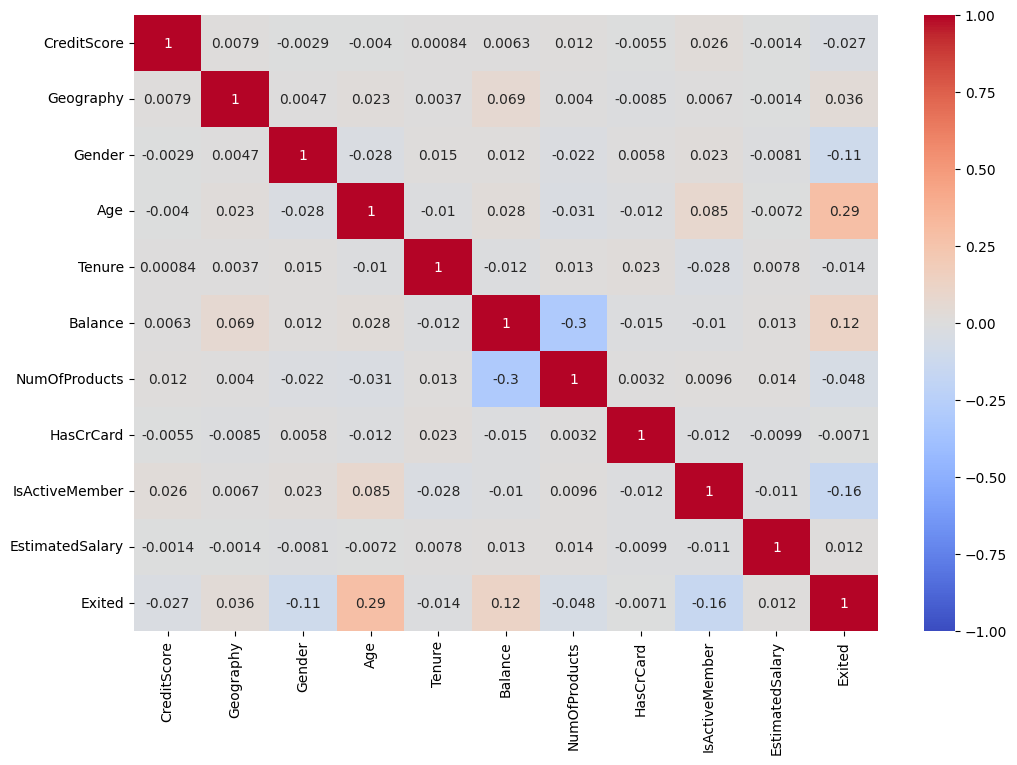

In [7]:
# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

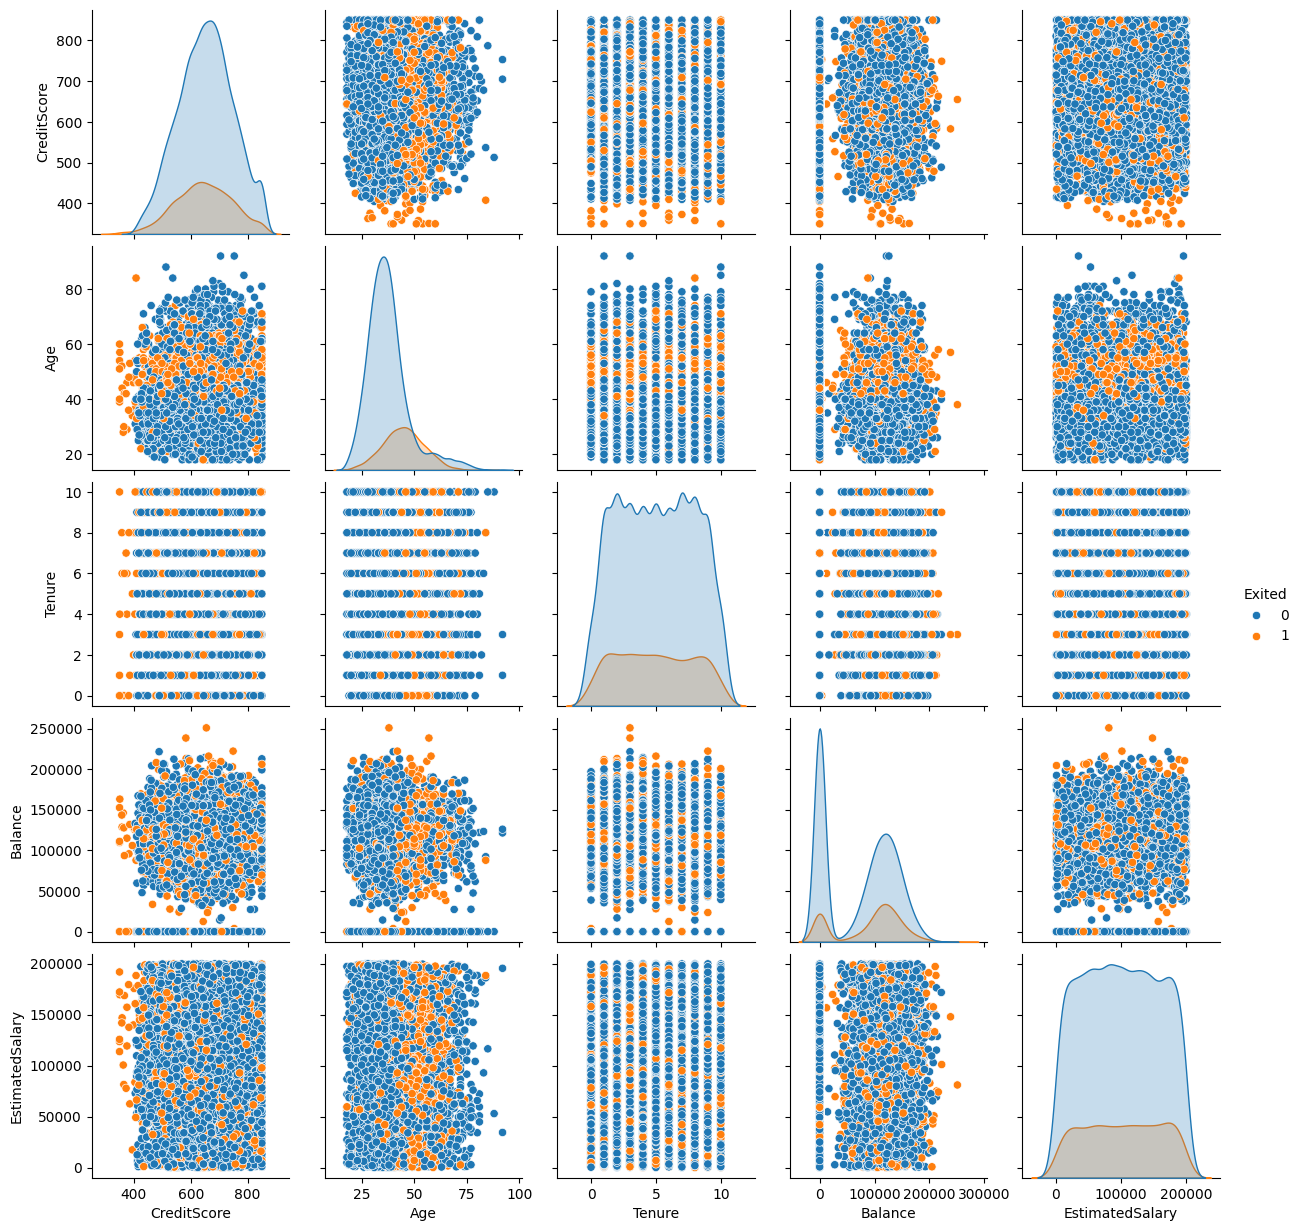

In [8]:
# Pairplot for selected features
sns.pairplot(data[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Exited']], hue='Exited')
plt.show()

Data Preprocessing

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into features and target
X = data.drop(columns=['Exited'])
y = data['Exited']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model Training

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Initialize the models
log_reg = LogisticRegression(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)

In [11]:
# Train the models
log_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

Hyperparameter Tuning

In [12]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [13]:
# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_gb = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid_gb, cv=3, scoring='accuracy', n_jobs=-1)

In [14]:
# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)
grid_search_gb.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200]},
             scoring='accuracy')

In [15]:
# Best parameters
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [16]:
# Use best estimators
best_random_forest = grid_search_rf.best_estimator_
best_gradient_boosting = grid_search_gb.best_estimator_

Model Evaluation

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_best_rf = best_random_forest.predict(X_test)
y_pred_best_gb = best_gradient_boosting.predict(X_test)

In [18]:
# Evaluate the models
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    return accuracy, precision, recall, f1, roc_auc

In [19]:
metrics_log_reg = evaluate_model(y_test, y_pred_log_reg)
metrics_best_rf = evaluate_model(y_test, y_pred_best_rf)
metrics_best_gb = evaluate_model(y_test, y_pred_best_gb)

In [20]:
# Display the evaluation metrics
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [metrics_log_reg[0], metrics_best_rf[0], metrics_best_gb[0]],
    'Precision': [metrics_log_reg[1], metrics_best_rf[1], metrics_best_gb[1]],
    'Recall': [metrics_log_reg[2], metrics_best_rf[2], metrics_best_gb[2]],
    'F1 Score': [metrics_log_reg[3], metrics_best_rf[3], metrics_best_gb[3]],
    'ROC AUC': [metrics_log_reg[4], metrics_best_rf[4], metrics_best_gb[4]]
})

print(metrics_df)

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression    0.8150   0.596639  0.180662  0.277344  0.575396
1        Random Forest    0.8655   0.792453  0.427481  0.555372  0.700050
2    Gradient Boosting    0.8655   0.754098  0.468193  0.577708  0.715428


Model Interpretation

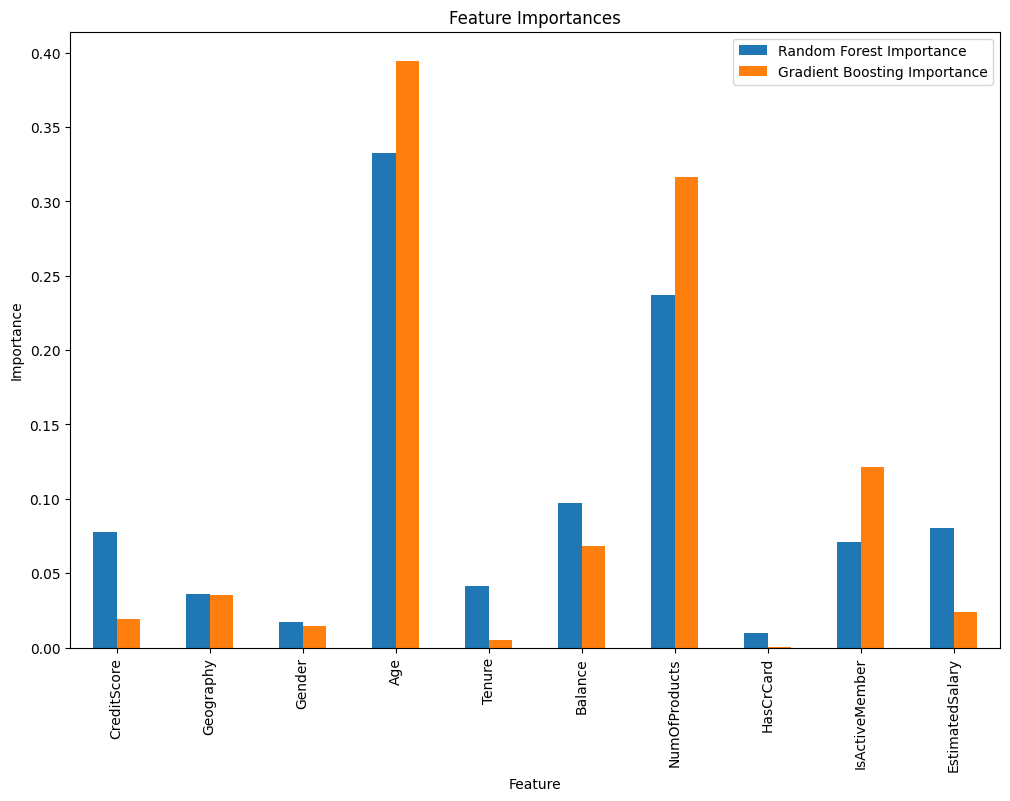

           Feature  Random Forest Importance  Gradient Boosting Importance
0      CreditScore                  0.077515                      0.019520
1        Geography                  0.036169                      0.035113
2           Gender                  0.017263                      0.014764
3              Age                  0.332446                      0.394402
4           Tenure                  0.041143                      0.005113
5          Balance                  0.097351                      0.068623
6    NumOfProducts                  0.236911                      0.316219
7        HasCrCard                  0.009492                      0.000681
8   IsActiveMember                  0.071121                      0.121439
9  EstimatedSalary                  0.080589                      0.024125


In [21]:
# Feature importance for Random Forest and Gradient Boosting
importances_best_rf = best_random_forest.feature_importances_
importances_best_gb = best_gradient_boosting.feature_importances_

# Create a DataFrame for feature importances
feature_names = X.columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Random Forest Importance': importances_best_rf,
    'Gradient Boosting Importance': importances_best_gb
})

# Plot feature importances
feature_importances_df.set_index('Feature').plot(kind='bar', figsize=(12, 8))
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.show()

print(feature_importances_df)


**THANK YOU!!!**